# EMO1: The Emotional Arc Visualizer 📊

emo1 is a Python tool that analyzes the emotional journey of a text and visualizes it as a graph. Instead of using complex AI models, it employs a lexicon-based approach to identify and quantify the emotional content of a story, chapter, or article. This makes it lightweight, fast, and highly interpretable.

-----

## How It Works

The core of emo1 is the **NRC Emotion Lexicon**, a database that maps thousands of English words to eight primary emotions (joy, sadness, anger, fear, etc.). The script works through the following steps:

1.  **Loads the "Brain":** It first reads the NRC Emotion Lexicon file to learn which words are associated with which emotions.
2.  **Chunks the Text:** It breaks the input story into smaller, sequential segments (chunks).
3.  **Analyzes Each Chunk:** For each chunk, it tokenizes the text into individual words, reduces them to their root form (**lemmatization**), and looks them up in the lexicon.
4.  **Scores Emotions:** It counts how many words associated with each emotion appear in the chunk.
5.  **Normalizes Scores:** To ensure fair comparisons between chunks of different lengths, it calculates the "emotional density" by dividing the word counts by the total number of words in the chunk.
6.  **Visualizes the Arc:** Finally, it uses `matplotlib` to plot these scores, creating a visual representation of the story's emotional flow.

-----

## Setup & Usage

### 1\. Prerequisites

  * Python 3.x
  * `pip` for package installation

### 2\. Installation

Open your terminal or command prompt and install the necessary Python libraries:

```bash
pip install pandas matplotlib nltk
```

### 3\. Required Files

Before running the script, make sure you have the following two files in the same directory:

1.  `nrc_lexicon (1).txt`: The emotional dictionary.
2.  `your_story.txt`: The text file you want to analyze.

### 4\. Running the Script

Execute the Python script from your terminal. The script is designed to be run in an environment like Google Colab, where it will prompt you to upload files, but the local version below is adapted for clarity.

-----

## Detailed Code Explanation

The script is built around the `emo1Analyzer` class (previously `PlotPulseAnalyzer`), which encapsulates all the logic for the analysis.

### The `emo1Analyzer` Class

#### `__init__(self, lexicon_path)` (The Constructor)

  * **Purpose:** To initialize a new `emo1Analyzer` object.
  * **What it does:**
      * It immediately calls `_load_lexicon()` to read the emotion dictionary from the provided file path and store it in `self.lexicon`. This is the "brain" of the analyzer.
      * It creates an instance of NLTK's `WordNetLemmatizer`, a tool used to reduce words to their root form (e.g., "running" -\> "run").

#### `_load_lexicon(self, filepath)` (The Brain Loader)

  * **Purpose:** To parse the `nrc_lexicon.txt` file.
  * **What it does:**
      * It opens the file and reads it line by line.
      * Each line is expected to be tab-separated (`word\temotion\tassociation`).
      * If the `association` value is `1`, it means the word is linked to that emotion.
      * It builds a Python dictionary where each key is a word and the value is a list of associated emotions (e.g., `{'happy': ['joy', 'trust']}`).
      * Includes a `try...except` block to handle a `FileNotFoundError` gracefully.

#### `_get_wordnet_pos(self, word)` (The Grammar Helper)

  * **Purpose:** To assist the lemmatizer by identifying a word's part of speech (POS).
  * **What it does:**
      * Lemmatization is more accurate if it knows whether a word is a verb, noun, adjective, etc.
      * This helper function takes a word, uses `nltk.pos_tag()` to get its POS tag, and converts it into a format that the `WordNetLemmatizer` understands.

#### `analyze(self, text, chunk_size=150)` (The Engine)

  * **Purpose:** This is the main analysis function. It takes the full story text and processes it.
  * **What it does, step-by-step:**
    1.  **Chunking:** It splits the entire text into a list of smaller strings, each containing `chunk_size` words.
    2.  **Iteration:** It loops through each `chunk`.
    3.  **Scoring:** Inside the loop, for each chunk:
          * It initializes a dictionary of scores for the eight emotions, all set to 0.
          * It tokenizes the chunk into a list of individual words using `word_tokenize()`.
          * It iterates through every `word` in the chunk.
          * For each `word`, it finds its root form (`lemma`) using the lemmatizer.
          * It checks if the `lemma` exists as a key in `self.lexicon`.
          * If it exists, it increments the score for each emotion associated with that word.
    4.  **Normalization:** After counting the emotional words in a chunk, it divides each emotion's score by the total number of words in that chunk. This converts a raw count into a density score, making the analysis fair.
    5.  **Returns Results:** It stores the scores for each chunk and returns them all as a single `pandas` DataFrame, which is perfectly structured for plotting.

#### `plot(self, dataframe, title)` (The Artist)

  * **Purpose:** To create the final visualization from the analysis data.
  * **What it does:**
      * It takes the `DataFrame` generated by the `analyze` method.
      * It uses the `.plot()` method from pandas, which is a wrapper around `matplotlib`.
      * `kind='bar'` and `stacked=True` are the key commands that create the stacked bar chart.
      * The rest of the function is dedicated to making the plot beautiful and readable: setting the title, labeling the axes, creating a legend, and adjusting the layout.

-----

## Customization

  * **Chunk Size:** You can easily change the granularity of the analysis by modifying the `chunk_size` argument in the `analyzer.analyze(story_text, chunk_size=200)` call. A smaller size gives a more detailed but potentially noisier graph.
  * **Plot Type:** Change `kind='bar'` in the `plot` function to `kind='line'` or `kind='area'` to experiment with different visualizations.
  * **Colors:** Change the `colormap='viridis'` argument to another `matplotlib` colormap like `'plasma'`, `'inferno'`, or `'magma'`.

In [ ]:
! pip install nltk matplotlib pandas

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from google.colab import files

In [ ]:
#! wget -q --show-progress -O nrc_lexicon.txt "https://archive.org/download/nrc-emotion-lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"


In [ ]:
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
class PlotPulseAnalyzer:
    """
    Analyzes and visualizes the emotional arc of a text using the NRC Lexicon.
    """
    def __init__(self, lexicon_path):
        self.lexicon = self._load_lexicon(lexicon_path)
        self.lemmatizer = WordNetLemmatizer()
        self.emotion_labels = ['joy', 'sadness', 'anger', 'fear', 'surprise', 'anticipation', 'disgust', 'trust']


    def _load_lexicon(self, filepath):
        """Loads the NRC lexicon into a dictionary."""
        lexicon = {}
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                for line in f:
                    parts = line.strip().split('\t')
                    if len(parts) == 3:
                        word, emotion, association = parts
                        if int(association) == 1:
                            lexicon.setdefault(word, []).append(emotion)
        except FileNotFoundError:
            print(f"Error: The lexicon file was not found at {filepath}")
            return None
        return lexicon

    def _get_wordnet_pos(self, word):
        """Map POS tag to the format needed by the lemmatizer."""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN,
                    "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def analyze(self, text, chunk_size=400):
        """
        Analyzes the text by chunking, lemmatizing, scoring emotions,
        and normalizing the results. Returns a pandas DataFrame.
        """
        if not self.lexicon:
             print("Cannot analyze: Lexicon not loaded.")
             return pd.DataFrame()

        words = text.split()
        # Ensure the last chunk is included, even if it's smaller than chunk_size
        chunks = [" ".join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

        results = []
        for chunk in chunks:
            chunk_words = word_tokenize(chunk.lower())
            scores = {emotion: 0 for emotion in self.emotion_labels}

            for word in chunk_words:
                lemma = self.lemmatizer.lemmatize(word, self._get_wordnet_pos(word))
                if lemma in self.lexicon:
                    for emotion in self.lexicon[lemma]:
                        if emotion in scores:
                            scores[emotion] += 1

            total_words = len(chunk_words)
            if total_words > 0:
                for emotion in scores:
                    scores[emotion] /= total_words

            results.append(scores)

        return pd.DataFrame(results)

    def plot(self, dataframe, title="Emotional Arc of the Story"):
        """
        Plots the emotional arc using a BAR graph, which is better for few chunks.
        """
        if dataframe.empty or dataframe.sum().sum() == 0:
            print("⚠️ WARNING: No emotional data to plot. The graph is empty.")
            return


        ax = dataframe.plot(
            kind='bar',
            stacked=True,
            figsize=(12, 8),
            colormap='viridis',
            width=0.4 # Making the bars a bit narrower
        )

        # This makes the x-axis labels clearer ("Chunk 1", "Chunk 2", etc.)
        ax.set_xticklabels([f"Chunk {i+1}" for i in range(len(dataframe))], rotation=0)

        plt.title(title, fontsize=18, weight='bold')
        plt.xlabel("Story Chunk", fontsize=12)
        plt.ylabel("Emotional Density", fontsize=12)
        plt.legend(title='Emotions', loc='upper left', bbox_to_anchor=(1.02, 1.0))
        plt.grid(axis='y', linestyle='--', alpha=0.7) # Gridlines only on y-axis
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

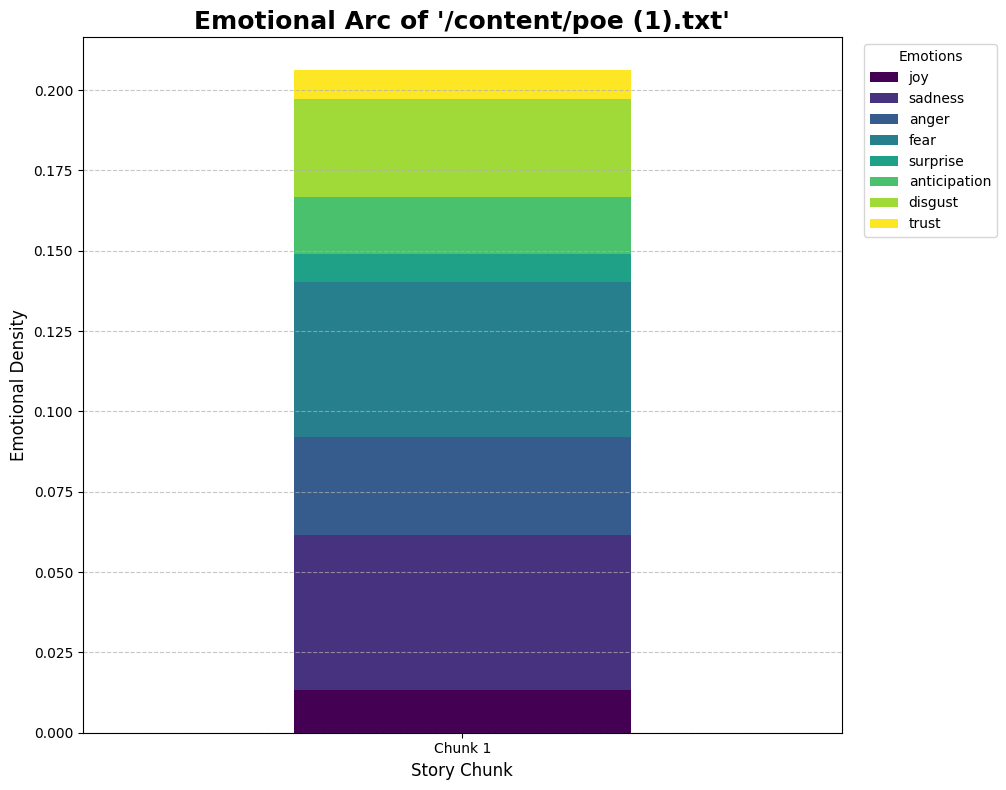

In [ ]:
LEXICON_FILE = 'nrc_lexicon.txt'
STORY_FILE = '/content/poe (1).txt'

# --- Read the story file ---
try:
    with open(STORY_FILE, "r", encoding="utf-8", errors='ignore') as f:
        story_text = f.read()

    # --- Run the analyzer and plot the results ---
    analyzer = PlotPulseAnalyzer(lexicon_path=LEXICON_FILE)
    emotional_df = analyzer.analyze(story_text)
    analyzer.plot(emotional_df, title=f"Emotional Arc of '{STORY_FILE}'")

except FileNotFoundError:
    print(f"Error: Could not find the story file '{STORY_FILE}'. Please make sure it's uploaded.")